<a href="https://colab.research.google.com/github/bcury/ComputerVision-and-NLP/blob/main/ML_NLP_DetectionEmailSpam_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aqui vamos aplicar uma solução de Machine Learning com NLP para construir um modelo para classificar se o email é spam ou não, e no fim veremos a acurácia deste modelo

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [2]:
dados = pd.read_csv('/content/emailspam.csv')

In [3]:
dados.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
dados.shape

(5728, 2)

In [5]:
dados.columns

Index(['text', 'spam'], dtype='object')

In [6]:
dados.drop_duplicates(inplace=True)
print(dados.shape)

(5695, 2)


In [7]:
dados.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [10]:
dados['text'].head().apply(process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

converter texto em matriz de tokenização

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process).fit_transform(dados['text'])

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message, dados['spam'], test_size=0.20, random_state=0)

In [15]:
message.shape

(5695, 37229)

**Naive Bayes classifier**

In [16]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

In [18]:
previsao = classifier.predict(xtest)
previsao

array([1, 0, 0, ..., 0, 0, 0])

In [19]:
ytest

977     1
3275    0
4163    0
751     1
3244    0
       ..
4506    0
1050    1
3366    0
2191    0
3911    0
Name: spam, Length: 1139, dtype: int64

In [20]:
from sklearn.metrics import accuracy_score, classification_report

In [21]:
accuracy_score(ytest, previsao)

0.9920983318700615

excelente acurácia

In [22]:
from yellowbrick.classifier import ConfusionMatrix

0.9920983318700615

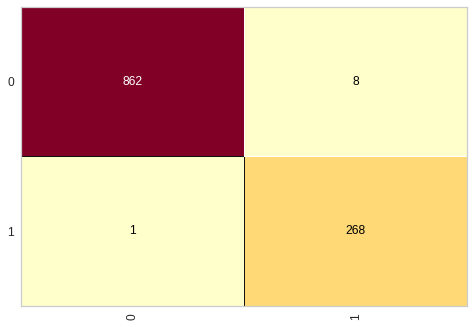

In [23]:
cm = ConfusionMatrix(classifier)
cm.fit(xtrain,ytrain)
cm.score(xtest, ytest)

aqui vemos que o algoritimo preveu muito bem, todas as classes

In [24]:
print(classification_report(ytest, previsao))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



aqui com mais alguns detalhes vemos o quão bom este modelo preveu os resultados, excelente acurácia e excelente padrões de classificação